In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from tqdm import tqdm

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

import numpy as np

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
x = torch.arange(-2,2, 0.001).view(-1,1)

In [4]:
def f(x):
    return -x**5 + 4*x**3

In [5]:
y = f(x)

In [6]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [7]:
x_norm = torch.from_numpy(x_scaler.fit_transform(x)).float()
y_norm = torch.from_numpy(y_scaler.fit_transform(y)).float()

In [8]:
x_norm = x_norm.to(device)
y_norm = y_norm.to(device)

In [18]:
class Model(nn.Module):
    def __init__(self, in_1, in_2, in_3, in_4, out):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(in_1,in_2)
        self.layer2 = nn.Linear(in_2,in_3)
        self.layer3 = nn.Linear(in_3,in_4)
        self.layer4 = nn.Linear(in_4,out)
        self.BN1 = nn.BatchNorm1d(in_2)
        self.BN2 = nn.BatchNorm1d(in_3)
        self.activation = nn.LeakyReLU()
    def forward(self,x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.BN1(x)
        x = self.layer2(x)
        x = self.activation(x)
        x = self.BN2(x)
        x = self.layer3(x)
        x = self.activation(x)
        x = self.layer4(x)
        return x

In [19]:
model = Model(1,50,40,30,1)
model.to(device)

Model(
  (layer1): Linear(in_features=1, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=40, bias=True)
  (layer3): Linear(in_features=40, out_features=30, bias=True)
  (layer4): Linear(in_features=30, out_features=1, bias=True)
  (BN1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN2): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation): LeakyReLU(negative_slope=0.01)
)

In [20]:
criterion  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001, momentum=0.9)

In [21]:
trainset = torch.utils.data.TensorDataset(x_norm, y_norm)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)

In [22]:
loss_train = []

for i in tqdm(range(20)):
    loss_train_e = 0.0
    for x_batch, y_batch in trainloader:
        optimizer.zero_grad()
        output = model(x_batch)
        loss = criterion(output, y_batch)
        loss_train_e += loss.item()
        loss.backward()
        optimizer.step()
    loss_train.append(loss_train_e)

100%|██████████| 20/20 [00:25<00:00,  1.31s/it]


In [23]:
final_output = model(x_norm)

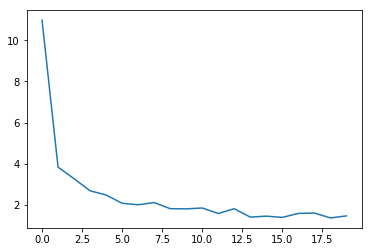

In [24]:
plt.plot(loss_train)

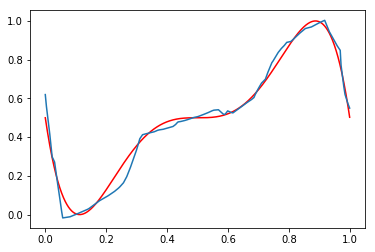

In [27]:
plt.plot(x_norm.cpu().numpy(),y_norm.cpu().numpy(),'r')
plt.plot(x_norm.cpu().numpy(),final_output.cpu().detach().numpy())